<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:50%"><img src='https://www.np.edu.sg/images/default-source/edm/schools-logos/ict-logo-full-colour.jpg'"></th>
        <th style="text-align:center;"><h1>Emerging Trend in Data Science </h1><h2>Assignment 2</h2><h2>Student name:Lim Wee Liang Kelven</h2><h2>Student ID:S10221788K</h2></th>
    </tr>
</table>

# ETDS Assignment 2, Lim Wee Liang Kelven, S10221788K

# Directory <a id = "top"></a>

### 0. [Import Libraries](#part0)

### 1. [Load Data](#part1)

### 2. [Train-test Split](#part2)

### 3. [Transform Data](#part3)

### 4. [Create Classification Model](#part4)

### 5. [Improve Model](#part5)

### 6. [XAI Technique](#part6)
- [6.1 Global Explanations](#part6.1)
- [6.2 Local Explanations](#part6.2)

### 7. [Self Reflection](#part7)

### 8. [References](#part8)

## Objectives
To assess students' ability to research and apply different eXplainable AI (XAI) techniques to explain the outcome/prediction of a machine learning model.

### Scope
This is an individual assignment. The assignment consists of a single classification problem to be solved. Students are to use at least one XAI technique to provide an explanation to the derived outcome/prediction/target of the unseen test samples. Students are to use the provided Jupyter notebook and build their solution. The assignment exposes the students to be able to explain why their machine learning model is producing the outcome.

# 0. Import Libraries <a id = "part0"></a>
[Back to top](#top)

In [1]:
# Import your necessary libraries
# Generic
import pandas as pd
import numpy as np
import os

# Train-test split
from sklearn.model_selection import train_test_split

# Modelling
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from lime import lime_tabular

# Plotting
from sklearn.inspection import PartialDependenceDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

# Youtube
from IPython.display import YouTubeVideo

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Load Data <a id = "part1"></a>
[Back to top](#top)

In [2]:
# Get present working directory (pwd)
pwd = os.getcwd()
pwd

'C:\\Users\\Kelve\\Downloads\\year_3.3\\ETDS\\ASG2'

In [38]:
# filename (str): name of file with file type

# FYI The code may not run because your test and train csv files are in a different folder

# Create a function to load data
def load_data(filename:str):
    
    # Load data
    data = pd.read_csv(pwd + './' + filename)
    
    # Returns dataset
    return data

In [4]:
# Load training data
train = load_data('train.csv')
train.head()

col1  col2  col3  col4  col5  col6  col7  col8  col9  col10  col11  target
0     1    50     1    57     7     0     7     0     2    142     21       1
1     2    37     1    38    26     7    11     2     0    465     23       1
2     3    29     1    27    18     2    12     2     1    679     27       0
3     4    47     1    51     7     1     4     0     1    916      5       0
4     5    18     0     1    14     3     0     1     0    195      1       1

In [5]:
# Load testing data
test = load_data('test.csv')
test.head()

col1  col2  col3  col4  col5  col6  col7  col8  col9  col10  col11
0     1    40     0    36    29     3    17     0     1    480     15
1     2    61     0    55    10     5    17     1     0    522     15
2     3    39     1    30     3     6    20     2     1    852     11
3     4    42     1    12    14     0    12     1     2    264     13
4     5    19     1    48    22     8    18     1     0    357     24

In [6]:
# See data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col1    6000 non-null   int64
 1   col2    6000 non-null   int64
 2   col3    6000 non-null   int64
 3   col4    6000 non-null   int64
 4   col5    6000 non-null   int64
 5   col6    6000 non-null   int64
 6   col7    6000 non-null   int64
 7   col8    6000 non-null   int64
 8   col9    6000 non-null   int64
 9   col10   6000 non-null   int64
 10  col11   6000 non-null   int64
 11  target  6000 non-null   int64
dtypes: int64(12)
memory usage: 562.6 KB


There are 12 columns, 6000 rows, no null values, and all integers

In [7]:
# See data info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   col1    5 non-null      int64
 1   col2    5 non-null      int64
 2   col3    5 non-null      int64
 3   col4    5 non-null      int64
 4   col5    5 non-null      int64
 5   col6    5 non-null      int64
 6   col7    5 non-null      int64
 7   col8    5 non-null      int64
 8   col9    5 non-null      int64
 9   col10   5 non-null      int64
 10  col11   5 non-null      int64
dtypes: int64(11)
memory usage: 568.0 bytes


There are 11 columns, 5 rows, no null values, and all integers.

The test dataset has no target column.

In [8]:
# A copy is created in case a rollback is needed. Remaking the copy is faster than re-reading the data.

# Create a copy of train
X = train.copy()
X.head()

col1  col2  col3  col4  col5  col6  col7  col8  col9  col10  col11  target
0     1    50     1    57     7     0     7     0     2    142     21       1
1     2    37     1    38    26     7    11     2     0    465     23       1
2     3    29     1    27    18     2    12     2     1    679     27       0
3     4    47     1    51     7     1     4     0     1    916      5       0
4     5    18     0     1    14     3     0     1     0    195      1       1

In [9]:
# Since this is a classification problem, there must be an equal proportion of 0's and 1's in the target column

# Check the count of each value in the target column
X['target'].value_counts()

target
1    3000
0    3000
Name: count, dtype: int64

Since there is an equal proportion of 0's and 1's in the target column, random sampling will not be needed.

In [10]:
# Since there is an equal proportion of 0's and 1's in the target column, random sampling will not be needed.
# The data can be prepared for train-test split.

# Create target column from train dataset and drop it
y = X['target']
X.drop(columns=['target'], inplace=True)
y.head()

0    1
1    1
2    0
3    0
4    1
Name: target, dtype: int64

# 2. Train-test Split <a id = "part2"></a>
[Back to top](#top)

In [11]:
# Separate into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((4200, 11), (1800, 11))

# 3. Transform Data <a id = "part3"></a>
[Back to top](#top)

In [12]:
# Feature engineering is used to reduce the scale of the values and improve model performance.
# In this case, a Z-score transformation is used.

# Create a function to load data
def transform_data(data):
    
    # Find mean of data
    mean=data.mean()
    
    # Find standard deviation of data
    sd=data.std()
    
    # Transform the data using a Z-score transformation
    data_tf = (data-mean)/sd
    
    # Returns dataset
    return data_tf

In [13]:
# Transform the train dataset
X_tf = transform_data(X_train)
X_tf.head()

col1      col2      col3      col4      col5      col6      col7  \
4831  1.054151  0.247489 -1.169276 -1.246447 -0.349883  0.203395  0.774457   
4646  0.947557 -0.081088  0.855027  0.608052  0.699933  0.537219 -0.086376   
2154 -0.488297 -0.491809  0.855027 -0.782822  0.233348  0.871044  0.405529   
1581 -0.818451  0.658210  0.855027 -1.188494 -1.632992 -0.464255  0.282552   
135  -1.651615 -0.245376 -1.169276 -0.608963  0.116702 -0.798079  1.020409   

          col8      col9     col10     col11  
4831  1.219816  1.693019 -1.482669 -0.720612  
4646  0.000000  1.693019 -0.455633 -0.250264  
2154  0.000000 -1.050828 -1.366644  0.220084  
1581  0.000000  0.321095  1.164419 -1.190960  
135  -1.219816  1.693019 -0.378283  0.455258

# 4. Create Classification Model <a id = "part4"></a>
[Back to top](#top)

In [14]:
# A decision tree is used because it is easily interpretable/understandable by design

# Create the model
# Set random_state to 0 for replicability
dtc = DecisionTreeClassifier(max_depth = 2, random_state = 0)

# Fit the model
dtc.fit(X_tf,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [15]:
# Create function to print model accuracy scores
def print_accuracy(model, x_train, y_train, x_test, y_test):
    
    # Get train and test accuracy scores
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    
    # Get accuracy scores using cross validation
    train_cv = cross_val_score(model, x_train, y_train, cv=10).mean()
    test_cv = cross_val_score(model, x_test, y_test, cv=10).mean()
    
    # Print score
    print(f'Training accuracy: {train_acc:.3f}')
    print(f'Testing accuracy: {test_acc:.3f}')
    print()
    print(f'Cross-validation training accuracy: {train_cv:.3f}')
    print(f'Cross-validation testing accuracy: {test_cv:.3f}')

In [16]:
# Accuracy score
print_accuracy(dtc, X_tf, y_train, X_test, y_test)

Training accuracy: 0.890
Testing accuracy: 0.583

Cross-validation training accuracy: 0.890
Cross-validation testing accuracy: 0.892


# 5. Improve Model <a id = "part5"></a>
[Back to top](#top)

In [17]:
# GridSearchCV is used to find the best hyperparameters when creating the model.

# model: machine learning model
# training_data: training data
# testing_data: testing data
# param_grid (dict): a dictionary of all the hyperparameters and values
# scoring (str): type of score evaluation to use
# cv (int): the number of duplicate models for cross-validation
# n_jobs (int): number of jobs to run in parallel

# Create a function to find the best hyperparameters
def find_hyperparameters(model, training_data, testing_data, param_grid:dict, scoring:str, cv:int, n_jobs:int):
    
    # Create GridSearch model
    gs = GridSearchCV(estimator = model, param_grid = param_grid, scoring = scoring, cv = cv, n_jobs = n_jobs)
    
    # Fit model
    gs = gs.fit(training_data,testing_data)
    
    # Print best score and best hyperparameters
    print(gs.best_score_)
    print(gs.best_params_)

In [18]:
# Create parameter grid
param_grid = {"criterion" : ["gini", "entropy", 'log_loss'], 
              'splitter': ['best', 'random'],
              "min_samples_leaf" : [1, 2, 3, 4, 5], 
              "min_samples_split" : [2, 4, 6, 8, 10], 
              'max_depth' : [None, 1, 2, 3, 4]
             }

# Find the best hyperparameters
find_hyperparameters(dtc, X_train, y_train, param_grid, 'accuracy', 10, -1)

0.9904761904761905
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}


In [19]:
# Create improved model using the best hyperparameters found
# Set random_state to 0 for replicability
dtc = DecisionTreeClassifier(criterion='gini', max_depth = None, min_samples_leaf=2, 
                             min_samples_split=10, splitter='best', random_state = 0)

# Fit the model
dtc.fit(X_tf,y_train)

# Accuracy score
print_accuracy(dtc, X_tf,y_train, X_test, y_test)

Training accuracy: 0.995
Testing accuracy: 0.501

Cross-validation training accuracy: 0.990
Cross-validation testing accuracy: 0.989


# 6. XAI Techniques <a id = "part6"></a>
[Back to top](#top)

## 6.1 Global Explanations <a id = "part6.1"></a>
[Back to top](#top)

Global explanations tell us what input features are the most important to the model. This gives an overview of the feature importances.

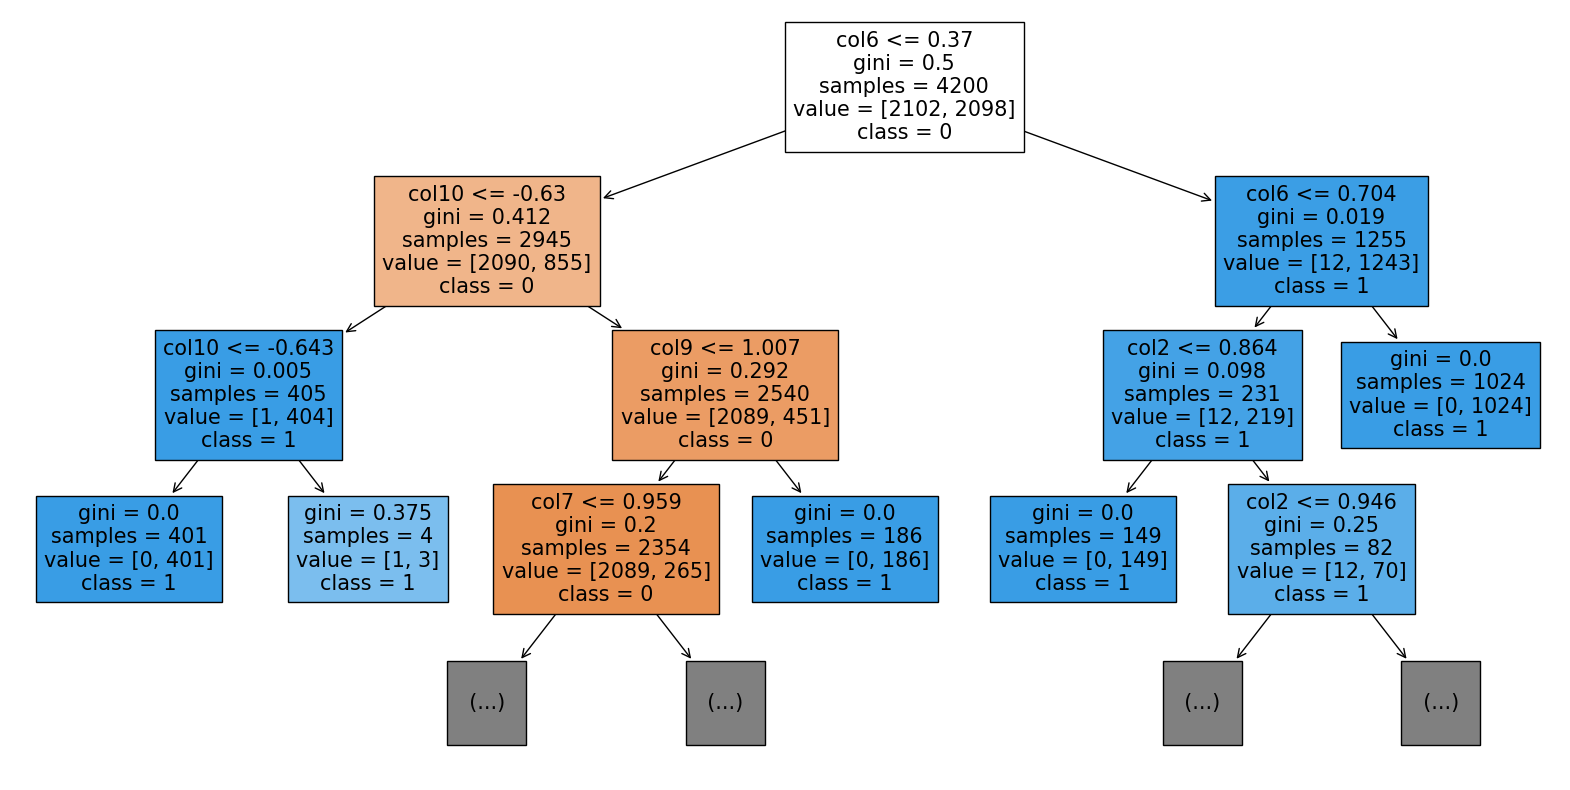

In [20]:
# Create a tree plot to show the decision tree breakdown

# Set figure size
plt.figure(figsize=(20,10))
plt.tight_layout()

# Plot tree
plot_tree(dtc, max_depth=3, filled=True, class_names=['0','1'], feature_names=X_tf.columns.tolist())
plt.show()

A decision tree was used as it is easily interpretable/understandable by design.

A tree node is split based on which feature will reduce its gini index the most. Hence, the more important a feature is, the more it will reduce the gini index. From the plot above, we can see which features are the most important: `col6`, `col10`, `col9`, `col2`, `col7`.

Another way to visualise feature importance is to use a bar chart.

In [21]:
# Create a dataframe for all features and their importance scores
# fi = feature importance
X_fi =pd.DataFrame({'feature_names':X_tf.columns, 'importances':dtc.feature_importances_})

# Run the code below to sort the dataframe in descending order of importance score
# X_fi.sort_values(by='importances', ascending=False)

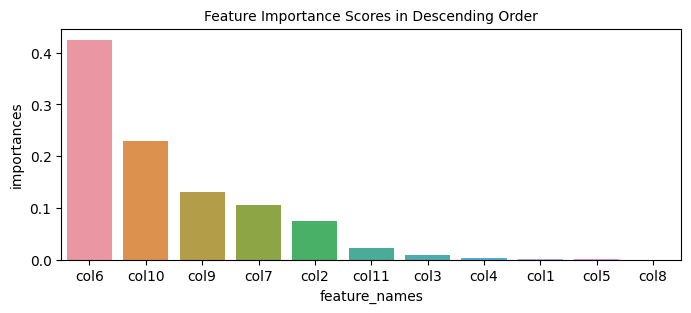

In [22]:
# Create a bar plot to show the fi scores
# Set figure size
plt.figure(figsize=(8,3))
plt.tight_layout()

# Set plot title
plt.title("Feature Importance Scores in Descending Order", size=10)

# Plot bars
sns.barplot(data=X_fi, x='feature_names', y='importances', 
            order=X_fi.sort_values('importances', ascending=False)['feature_names'])

plt.show()

Above, we can see that the top 5 important columns are 6, 10, 9, 7, and 2

In [23]:
# Create a list for the top 5 important features (col2, col6, col7, col9, col10)
features=['col2', 'col6', 'col7', 'col9', 'col10']

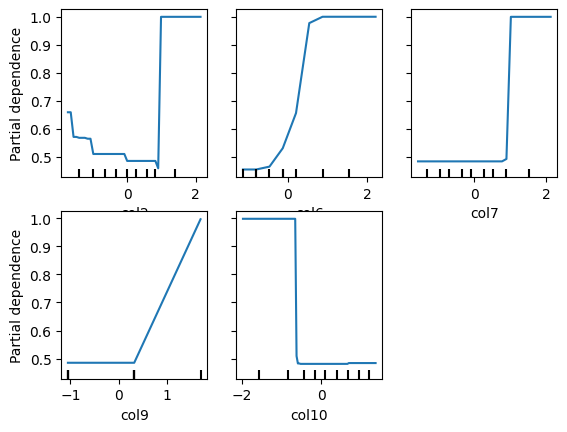

In [24]:
# Plot Partial Dependence Plots (PDPs) for train data
# Set random_state to 0 for replicability
PartialDependenceDisplay.from_estimator(dtc, X_tf, features=features, target=0, kind='average', random_state=0)

The plot above are partial dependence plots (PDPs). PDPs answer how each feature affects the output regardless of the other features.

The x-axis represent the feature values, and the y-axis represent how likely it affects the outcome.

Partial dependance = PD

- In `col2`, when x=-2, PD=0.675. When -2<x<1, PD decreases to 0.5. When x=1, PD increases to 1. When x>1, PD plateaus at 1. This shows that `col2` has a strong effect when it is at least 1.

- In `col6`, when x<-1, PD=0.45. When -1<x<1, PD increases to 1. When x>1, PD plateaus at 1. This shows that `col6` has a strong effect when it is at least 1.

- In `col7`, when x<1, PD=0.5. When x=1, PD increases to 1. When x>1, PD plateaus at 1. This shows that `col7` has a strong effect when it is at least 1.

- In `col9`, when x<0.25, PD=0.5. When x>0.25, PD increases to 1. This shows that `col9` has a strong effect when it is more than 0.25.

- In `col10`, when x<-1, PD=1. When x=-1, PD decreases to 0.5. When x>-1, PD plateaus at 0.5. This shows that `col10` has a strong effect when it is less than -1.

## 6.2 Local Explanations <a id = "part6.2"></a>
[Back to top](#top)

Local explanations indicate which features were the most important for a specific prediction. These features can be different from the global explanations.

In [36]:
# index (int): row index

# Create a function to show a sample prediction from the dataframe using LIME
def show_lime(model, xtrain, ytrain, xtest, index:int):
    
    # Create the model
    explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(xtrain), mode="classification", 
                                                  class_names=['0','1'], training_labels=y_train,
                                                  feature_names=xtrain.columns)

    # Explain the (index + 1) instance with the top 5 features
    exp = explainer.explain_instance(data_row=xtest.iloc[index], predict_fn=model.predict_proba, num_features=5)

    # Show plot of explanation
    exp.show_in_notebook(show_table=True)

In [37]:
# Show 1st instance
show_lime(dtc,X_tf,y_train,X_test,0)

1. The left graph shows that the predicted value for sample 1 in the test data is 1


2. The center graph shows the feature that helped predict the target 
 - `col7` more than 0.65 having a 27% importance score
 - `col2` more than 0.66 with 26%
 - `col10` more than 0.82 with 11%
 - `col9` between -1.05 and 0.32 with 10%
 - `col6` between -0.13 and 0.54 with 9%
 

3. The right graph shows the actual values of each feature of the sample

In [27]:
# Show 2nd instance
show_lime(dtc,X_tf,y_train,X_test,1)

1. The left graph shows that the predicted value for sample 2 in the test data is 1


2. The center graph shows the feature that helped predict the target 
 - `col6` more than 0.54 having a 35% importance score
 - `col7` more than 0.65 with 27%
 - `col2` more than 0.66 with 26%
 - `col10` more than 0.82 with 14%
 - `col9` between -1.05 and 0.32 with 9%
 

3. The right graph shows the actual values of each feature of the sample

In [28]:
# Show 3rd instance
show_lime(dtc,X_tf,y_train,X_test,2)

1. The left graph shows that the predicted value for sample 3 in the test data is 1


2. The center graph shows the feature that helped predict the target 
 - `col9` more than 0.32 having a 31% importance score
 - `col2` more than 0.66 with 28%
 - `col10` more than 0.82 with 10%
 - `col7` between -0.09 and 0.65 with 8%
 - `col6` between -0.13 and 0.54 with 8%
 

3. The right graph shows the actual values of each feature of the sample

In [29]:
# Show 4th instance
show_lime(dtc,X_tf,y_train,X_test,3)

1. The left graph shows that the predicted value for sample 4 in the test data is 1


2. The center graph shows the feature that helped predict the target 
 - `col6` more than 0.54 having a 31% importance score
 - `col9` more than 0.32 with 29%
 - `col7` more than 0.65 with 26%
 - `col2` more than 0.66 with 26%
 - `col10` betmore than 0.82 with 10%
 

3. The right graph shows the actual values of each feature of the sample

In [30]:
# Show 5th instance
show_lime(dtc,X_tf,y_train,X_test,4)

1. The left graph shows that the predicted value for sample 5 in the test data is 1


2. The center graph shows the feature that helped predict the target 
 - `col6` more than 0.54 having a 33% importance score
 - `col9` more than 0.32 with 29%
 - `col7` more than 0.65 with 28%
 - `col2` more than 0.66 with 25%
 - `col10` betmore than 0.82 with 12%
 

3. The right graph shows the actual values of each feature of the sample

These predictions were made with a model with a cross-validation test score of ~98%. Do note that these predictions MIGHT be reversed because the class names in `class_names=['0','1']` from `show_lime()` might be reversed. For example, instead of 0 and 1, it might be 1 and 0.

# 7. Self Reflection <a id = "part7"></a>
[Back to top](#top)

Do a self-reflection on what you had initially knew about and learned from the topics covered in this module as a Markdown cell.

At the start of the semester, I thought ETDS and AI ethics was just another light-hearted content I could forget in the future. But as I did my ASG1, I realised how AI ethics were important in the real-world. Companies handling AI have to deal with the issues we learnt. I also knew nothing about explainable AI (XAI). To be honest, I could not explain or understand of my ML models in these 3 years.

Throughout the weeks, I slowly learnt more about ethical issues (internal governance, human centricity, datamanagement) and real-world consequences. That made me reflect on what I might do after graduation. Similarly for XAI, I learnt that my audience are not always data analysts. I have to create simplified models and interpretable graphs for them to understand.

# 8. References <a id = "part8"></a>
[Back to top](#top)

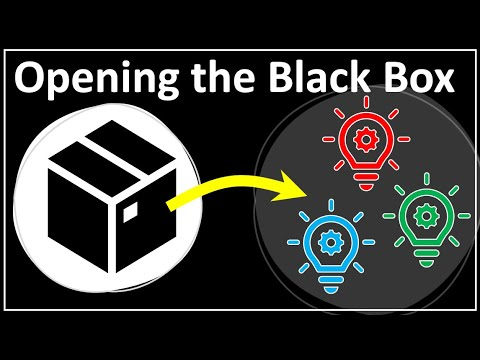

In [31]:
YouTubeVideo('uQQa3wQgG_s')

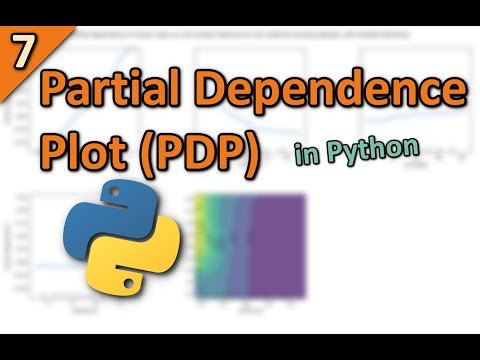

In [32]:
YouTubeVideo('21QAKe2PDkk')

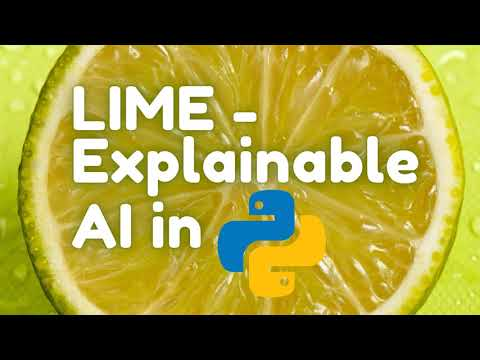

In [33]:
YouTubeVideo('eUu9xwraeqo')

1. https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html
2. https://medium.com/ing-blog/model-explainability-how-to-choose-the-right-tool-6c5eabd1a46a#:~:text=An%20example%20of%20a%20global,of%20global%20and%20local%20explanations
3. https://www.linkedin.com/learning/machine-learning-and-ai-foundations-producing-explainable-ai-xai-and-interpretable-machine-learning-solutions/local-and-global-explanations?leis=LTI13&resume=false&u=42538748
4. https://christophm.github.io/interpretable-ml-book/